<a href="https://colab.research.google.com/github/felstuff/HowToColab/blob/master/FirstAttemptOnCoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/felstuff/HowToColab/master/fathersonheight.csv')

x = dataset ["Father"].values.reshape(-1, 1)
y = dataset ["Son"].values

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

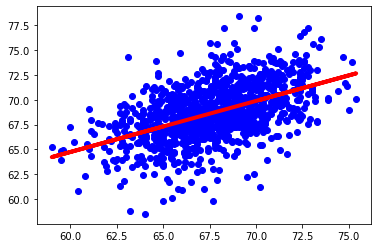

In [44]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue")
plt.plot(x, lin_reg.predict(x), color="red", linewidth=4)
plt.show()


In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

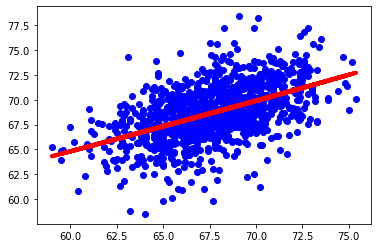

In [46]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue")
plt.plot(x, lin_reg_poly.predict(poly.fit_transform(x)), color="red", linewidth=4)
plt.show()

In [47]:
import pandas as pd

dataset = pd.read_csv ('https://raw.githubusercontent.com/felstuff/HowToColab/master/admissiondata.csv')
x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 7].values

# iloc is for columns only, so always start with "iloc[:, <start of column number>:<end of column number>]"; then the remaining column that's not included would be wat u're trying to compare
# ":" is to include everything from the dataset; and that can be the second part of the ratio as well  

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) - is how the script is written, so jst need to copy the whole code, when running "trian_test_split" 
# 0.2 or 20% of data set to be set side for testing is the industry standard. but can scale up or down depending on how big/small the data set is

In [53]:
from sklearn.preprocessing import PolynomialFeatures
multi_poly = PolynomialFeatures(degree=4)
x_poly = multi_poly.fit_transform(x_train)
multi_poly.fit(x_poly, y_train)


PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#Standard scaler basically is to group all the necessary fields on the dataset, so that all the data can fall onto ONE axis 

In [55]:
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_preds = lin_reg_multi.predict(multi_poly.fit_transform(x_test))

from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_preds))

0.030254552740300342
